# Importing the libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.pipeline import Pipeline

#to data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#NLP tools
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

#train split and fit models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from nltk.tokenize import TweetTokenizer

#model selection
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Importing the dataset

In [2]:
dataset = pd.read_csv('labeled_data.csv')
dataset.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [4]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,24783.0,12681.192027,7299.553863,0.0,6372.5,12703.0,18995.5,25296.0
count,24783.0,3.243473,0.883060,3.0,3.0,3.0,3.0,9.0
hate_speech,24783.0,0.280515,0.631851,0.0,0.0,0.0,0.0,7.0
offensive_language,24783.0,2.413711,1.399459,0.0,2.0,3.0,3.0,9.0
neither,24783.0,0.549247,1.113299,0.0,0.0,0.0,0.0,9.0
class,24783.0,1.110277,0.462089,0.0,1.0,1.0,1.0,2.0


In [5]:
dt_transformed = dataset[['class', 'tweet']]
y = (dt_transformed.iloc[:, :-1].values).ravel()
dt_transformed

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


In [7]:
df_train

,class,tweet
17239,2,RT @SenorSteez: This whole week was trash
14029,1,RT @44BINKO: @BreadTruckkBri &#128514;&#128514...
1753,1,&#8220;@dreadHEADkidd69: pussy prolly taste li...
4250,1,@NaughtyBoyMusic bitch me too
3949,1,@LlishaH LOL! It's an acronym for: that hoe ov...
...,...,...
906,1,#real RT @ImTooMuch: RT @d_lac: RT @WeavusChri...
10555,1,"I hope i trip and fall into some pussy, tunechi"
11951,2,"It's just not the same, #LittleDebbie #Cloud #..."
13652,1,"One thing I love about russel Wilson, he ain't..."


In [26]:
df_test

,class,tweet
11514,1,"If I've never seen her do some ""hoe"" shit with..."
12696,2,"Mace For Your Wife, Charlie Brown? #rejectedpe..."
17640,1,RT @TheBossUnicorn_: I'm a crazy bitch.. fml
22082,2,This is why my mother isn't allowed to make br...
10911,1,I swear I hate when Im somewhere and a woman c...
...,...,...
6027,1,"@ginamariez im an ole bitch in Memphis,tn. and..."
6394,1,@kevkid79 quit ya hating you oyster lookin ass...
16862,1,"RT @PacmansBack: I don't even delete my typos,..."
18353,1,RT @_TootieDee: Ion want the pussy if it come ...


In [6]:
# Splitting the df into training and testing
df_train, df_test = train_test_split(dt_transformed, test_size = 0.10, random_state = 42, stratify=dt_transformed['class'])
df_train.shape, df_test.shape

((22304, 2), (2479, 2))

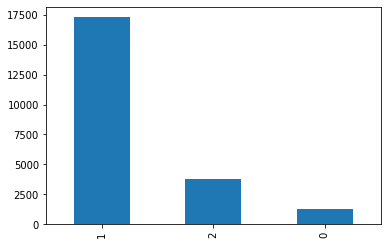

In [8]:
df_train['class'].value_counts().plot(kind='bar')

0 - Hate speech

1 - Offensive language

2 - neither

## Cleaning the texts

In [9]:
def preprocessing(data):
    stemmer = nltk.stem.RSLPStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    corpus = []
    for tweet in data:
      review = re.sub(r"@[A-Za-z0-9_]+", " ", tweet)
      review = re.sub('RT', ' ', review)
      review = re.sub(r"https?://[A-Za-z0-9./]+", " ", review)
      review = re.sub(r"https?", " ", review)
      review = re.sub('[^a-zA-Z]', ' ', review)
      review = review.lower()
      review = review.split()
      ps = PorterStemmer()
      review = [ps.stem(word) for word in review if not word in set(all_stopwords) if len(word) > 2]
      review = ' '.join(review)
      corpus.append(review)

    return np.array(corpus)

In [10]:
import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [11]:
corpus = preprocessing(df_train['tweet'].values)
corpus.shape

(22304,)

In [12]:
# corpus training and validation
c_train, c_vad, y_train, y_vad = train_test_split(corpus, df_train['class'], test_size = 0.10, random_state = 42, stratify=df_train['class'])
c_train.shape, c_vad.shape

((20073,), (2231,))


## Extracting features using tokenization

In [13]:
def tokenize(c_train, c_vad):
    tweet_tokenizer = TweetTokenizer() 
    vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize, max_features = 1010)
    X_train = vectorizer.fit_transform(c_train).toarray()
    X_vad = vectorizer.transform(c_vad).toarray()
    return X_train, X_vad

In [14]:
X_train, X_vad = tokenize(c_train, c_vad)
X_train.shape, X_vad.shape

((20073, 1010), (2231, 1010))

## Training Logistic Regression

In [32]:
# Logistic Regression
model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state = 0)
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_vad)

# Making the Confusion Matrix

In [16]:
def set_confusion_matrix(clf, X, y, title):
    plot_confusion_matrix(clf, X, y)
    plt.title(title)
    plt.show()

In [36]:
model

LogisticRegression(multi_class='ovr', random_state=0, solver='liblinear')

In [37]:
X_vad

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [38]:
y_vad

14751    2
22026    1
686      1
7640     1
849      2
        ..
13070    0
13667    1
4575     1
21336    2
23591    1
Name: class, Length: 2231, dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


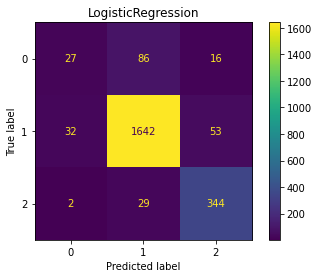

In [17]:
set_confusion_matrix(model, X_vad, y_vad, type(model).__name__)

In [18]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_vad, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.44      0.21      0.28       129
     class 1       0.93      0.95      0.94      1727
     class 2       0.83      0.92      0.87       375

    accuracy                           0.90      2231
   macro avg       0.74      0.69      0.70      2231
weighted avg       0.89      0.90      0.89      2231



## Better analyzing the words of each class

In [19]:
conjunto = c_train
hate_tweets = [sentence for sentence, label in zip(conjunto, y) if label == 0]
off_tweets = [sentence for sentence, label in zip(conjunto, y) if label == 1]
none_tweets = [sentence for sentence, label in zip(conjunto, y) if label == 2]

In [20]:
hate_words = ' '.join(hate_tweets)
off_words = ' '.join(off_tweets)
none_words = ' '.join(none_tweets)

In [21]:
def get_wordcloud(text):
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

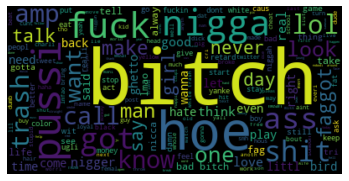

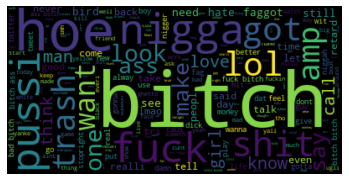

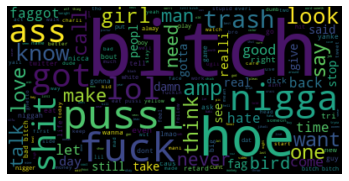

In [22]:
get_wordcloud(hate_words)
get_wordcloud(off_words)
get_wordcloud(none_words)

## Accuracy of the model

In [39]:
model_acc = accuracy_score(y_vad, y_pred)
print("Test accuarcy: {:.2f}%".format(model_acc*100))

Test accuarcy: 90.23%


In [23]:
def wordListToFreqDict(wordlist):
    wordfreq = [(wordlist.count(p))/len(wordlist) for p in wordlist]
    return dict(list(zip(wordlist,wordfreq)))

In [24]:
def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux

In [41]:
hate_dict = sortFreqDict(wordListToFreqDict(hate_words.split()))
off_dict = sortFreqDict(wordListToFreqDict(off_words.split()))
none_dict = sortFreqDict(wordListToFreqDict(none_words.split()))

In [42]:
len(hate_dict), len(off_dict), len(none_dict)

(2624, 11775, 5189)

Getting the words that appear the most in each class

In [43]:
def get_common(wordlist, n):
    return ([w[1] for w in wordlist])[:n]

common_words = list()
common_words.append(get_common(hate_dict, 2000))
common_words.append(get_common(off_dict, 1000))
common_words.append(get_common(none_dict, 1000))
common_words = np.unique(np.hstack(common_words))

In [44]:
common_words_dict = ({i:j for i, j in zip(common_words, range(len(common_words)))})

In [45]:
tweet_tokenizer = TweetTokenizer()
vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize, vocabulary=common_words_dict)
X_train = vectorizer.fit_transform(c_train).toarray()
X_vad = vectorizer.transform(c_vad).toarray()
X_train.shape, X_vad.shape

((20073, 2300), (2231, 2300))

In [46]:
# Logistic Regression
model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state = 0)
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_vad)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


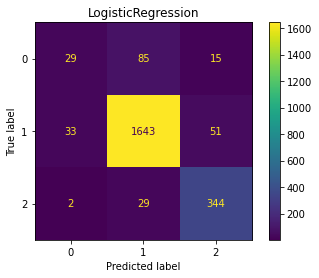

In [47]:
set_confusion_matrix(model, X_vad, y_vad, type(model).__name__)

In [48]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_vad, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.45      0.22      0.30       129
     class 1       0.94      0.95      0.94      1727
     class 2       0.84      0.92      0.88       375

    accuracy                           0.90      2231
   macro avg       0.74      0.70      0.71      2231
weighted avg       0.89      0.90      0.89      2231



In [49]:
model_acc = accuracy_score(y_vad, y_pred)
print("Test accuarcy: {:.2f}%".format(model_acc*100))

Test accuarcy: 90.36%


> ### UNDERSAMPLING

We see that the algorithms still continue to confuse a lot of hate speech (0) with offensive language (1). Let's try to improve the problem of balancing this data.

In [50]:
n_off, n_none, n_hate = df_train['class'].value_counts()
n_hate, n_off, n_none 

(1287, 17270, 3747)

In [52]:
df_hate = df_train[df_train['class'] == 0]
df_off = df_train[df_train['class'] == 1]
df_none = df_train[df_train['class'] == 2]

In [53]:
df_off_under = df_off.sample(n_hate, random_state=0)
df_none_under = df_none.sample(n_hate, random_state=0)

df_under = pd.concat([df_hate, df_off_under, df_none_under], axis=0)
print(df_under['class'].value_counts())

0    1287
1    1287
2    1287
Name: class, dtype: int64



Now training the models with this data:

In [54]:
corpus_under = preprocessing(df_under['tweet'].values)

In [55]:
# treino e validação do corpus
c_train, c_vad, y_train, y_vad = train_test_split(corpus_under, df_under['class'], test_size = 0.10, random_state = 42, stratify=df_under['class'])
c_train.shape, c_vad.shape

((3474,), (387,))

In [56]:
X_train, X_vad = tokenize(c_train, c_vad)
X_train.shape, X_vad.shape

((3474, 1010), (387, 1010))

In [57]:
# Logistic Regression
model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state = 0)
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_vad)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


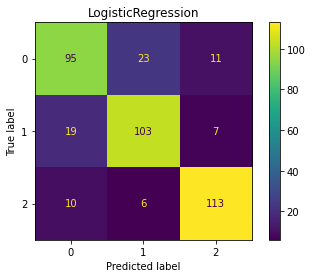

In [58]:
set_confusion_matrix(model, X_vad, y_vad, type(model).__name__)

In [59]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_vad, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.77      0.74      0.75       129
     class 1       0.78      0.80      0.79       129
     class 2       0.86      0.88      0.87       129

    accuracy                           0.80       387
   macro avg       0.80      0.80      0.80       387
weighted avg       0.80      0.80      0.80       387



In [60]:
model_acc = accuracy_score(y_vad, y_pred)
print("Test accuarcy: {:.2f}%".format(model_acc*100))

Test accuarcy: 80.36%


### OVERSAMPLING

In [61]:
n_off, n_none, n_hate = df_train['class'].value_counts()
n_hate, n_off, n_none 

(1287, 17270, 3747)

In [62]:
df_hate_over = df_hate.sample(n_off, replace=True, random_state=0)
df_none_over = df_none.sample(n_off, replace=True, random_state=0)
df_over = pd.concat([df_off, df_hate_over, df_none_over], axis=0)

print('Random over-sampling:')
print(df_over['class'].value_counts())

Random over-sampling:
1    17270
0    17270
2    17270
Name: class, dtype: int64


In [63]:
corpus_over = preprocessing(df_over['tweet'].values)
# treino e validação do corpus
c_train, c_vad, y_train, y_vad = train_test_split(corpus_over, df_over['class'], test_size = 0.10, random_state = 42, stratify=df_over['class'])
c_train.shape, c_vad.shape

((46629,), (5181,))

In [64]:
X_train, X_vad = tokenize(c_train, c_vad)
X_train.shape, X_vad.shape

((46629, 1010), (5181, 1010))

In [65]:
# Logistic Regression
model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state = 0)
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_vad)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


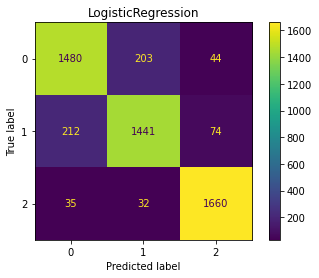

              precision    recall  f1-score   support

     class 0       0.86      0.86      0.86      1727
     class 1       0.86      0.83      0.85      1727
     class 2       0.93      0.96      0.95      1727

    accuracy                           0.88      5181
   macro avg       0.88      0.88      0.88      5181
weighted avg       0.88      0.88      0.88      5181



In [66]:
set_confusion_matrix(model, X_vad, y_vad, type(model).__name__)
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_vad, y_pred, target_names=target_names))

In [67]:
model_acc = accuracy_score(y_vad, y_pred)
print("Test accuarcy: {:.2f}%".format(model_acc*100))

Test accuarcy: 88.42%


Enlarging the samples so that they are balanced resulted in better results, but since the data is repeated, I'm not sure the model generalizes the problem well. The ideal would be to increase the samples with a certain variance between them.